[View in Colaboratory](https://colab.research.google.com/github/ArjunGajmer/United-State-Census/blob/master/Census_Prediction.ipynb)

#United States Census Income

The  aim of the project  is to  working on United States Census datasets for predicting  the income of a person ,preparing EDA,Datacleaning and feature engineering.


## Data Description

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census [Database](https://github.com/ArjunGajmer/United-State-Census/blob/master/census.csv). The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".

The dataset doesn't have specified the columns so it has been specified manually .
The dataset consists of continous and categorical data along with some missing values.It has 32,561 rows and 15 columns.

## Attributes
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, 8. Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. Inome
 
 
 
 

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics  as met
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
columns=['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'HoursperWeek','Native_country','Income']

## Loading dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ArjunGajmer/United-State-Census/master/census.csv',names=columns)


In [4]:
print('First five rows of dataframe:\n ')
df.head()

First five rows of dataframe:
 


,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,HoursperWeek,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:

print('Shape: ')
original_shape=df.shape
original_shape


Shape: 


(32561, 15)

In [6]:
print('Size: ')
df.size

Size: 


488415

In [7]:
print('Statistical Decription of nummerical data:')
df.describe()

Statistical Decription of nummerical data:


,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,HoursperWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
print('Statistical Decription of object')
df.describe(include='object')

Statistical Decription of object


,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Data Cleaning

**Checking Null Values**

In [9]:
df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education_num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
HoursperWeek      0
Native_country    0
Income            0
dtype: int64

We can see that there is no null value present in the datasets.However there are unkonwn values present in form of '? in the dataset.'

In [10]:
for col in df.columns:
  if df[col].dtypes==object:
     print(col,(df[col]==' ?').sum()) 

('Workclass', 1836)
('Education', 0)
('Marital_Status', 0)
('Occupation', 1843)
('Relationship', 0)
('Race', 0)
('Sex', 0)
('Native_country', 583)
('Income', 0)


So,we can see that three columns Workclass,Education and Native_country have some unknown values.Let us remove the them.

In [11]:
df=df.drop(df[df['Native_country']==' ?'].index,axis=0)

In [12]:
df=df.drop(df[df['Workclass']==' ?'].index,axis=0)

In [13]:
df=df.drop(df[df['Occupation']==' ?'].index,axis=0)

In [14]:
print('Shape: ')
df.shape

Shape: 


(30162, 15)

After removing the unknown values we  are reduced to 30162 rows .Let us check whether any unknown values are present in datasets or not. 



In [15]:
for col in df.columns:
  if df[col].dtypes==object:
     print(col,(df[col]==' ?').sum()) 

('Workclass', 0)
('Education', 0)
('Marital_Status', 0)
('Occupation', 0)
('Relationship', 0)
('Race', 0)
('Sex', 0)
('Native_country', 0)
('Income', 0)


We have now no null values or unknown values ,hence we have cleaned our datasets.

## Exploratory data analysis(EDA)
 Here we will try to analysis the data.We will find the relation between various attributes and also find the main factors for responsible the income of a person.

### Univariate Analysis

In univariate analysis we will try to analysis the each features separately(one at a time).

#### AGE distribution plot


 The age distribution plot shows that:
 1. The census has recorded information most for the age between 30 to 50  years.
 2. Some of people are older than 80 years.

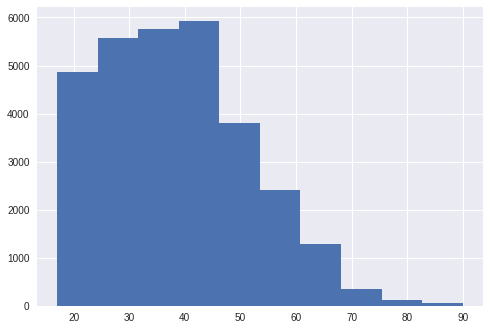

In [16]:
plt.hist(df['Age'])
plt.show()

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


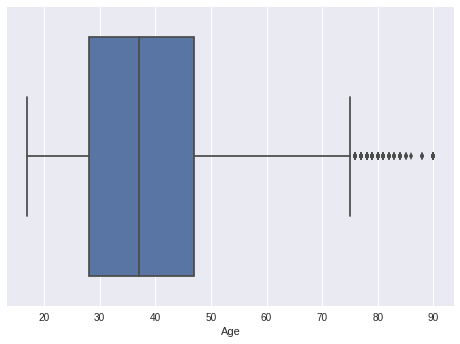

In [17]:
sns.boxplot(df.Age)
sns.despine()

#### Race Countplot

The race countplot suggests us that white race in numbers is most dominanat over other.There are also people whose race are not verfied yet.

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


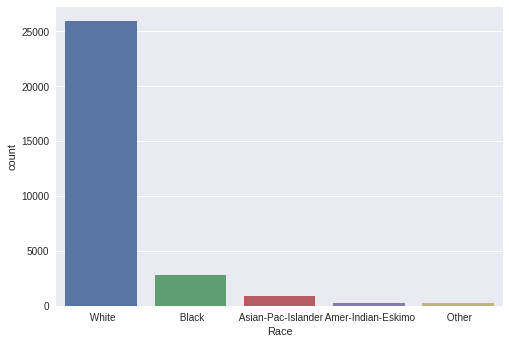

In [18]:
sns.countplot(df.Race)
sns.despine()

#### Income Count Plot

The plot suggests us that most of the people are earning less than 50k.Infact people earning more that 50k are even less than half in terms of number  to people who are earning below or equal to 50k.

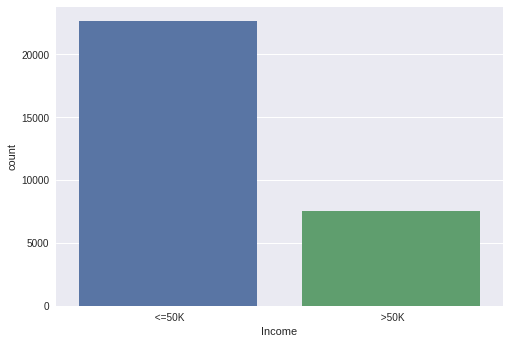

In [19]:
sns.countplot(df.Income)
sns.despine()


#### Workclass plot

The plot suggests us: 
1. That most of the population are working in private firm .
2. Although there are people working in other department also but are incomparable to population working in private firm.
3. People who are self employed are mostly  not in inc,  
4. There are also few people who are not paid (around 14).

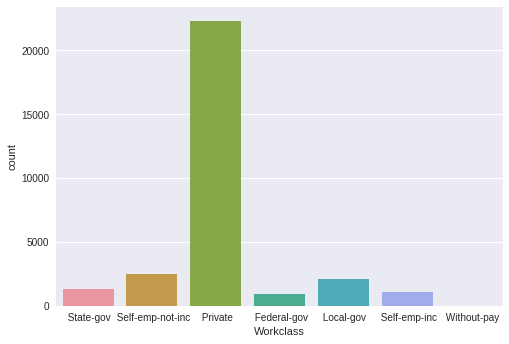

In [20]:
sns.countplot(df.Workclass)
sns.despine()

In [21]:
(df['Workclass']==' Without-pay').sum() 

14

#### Education plot

The plot shows that :
1. Most popluation are high school garduates ( near about 9500). 
2. People around 7000 went to some college and around 5000 are bachelors.
3. Most people have degree more than 12th satandard.


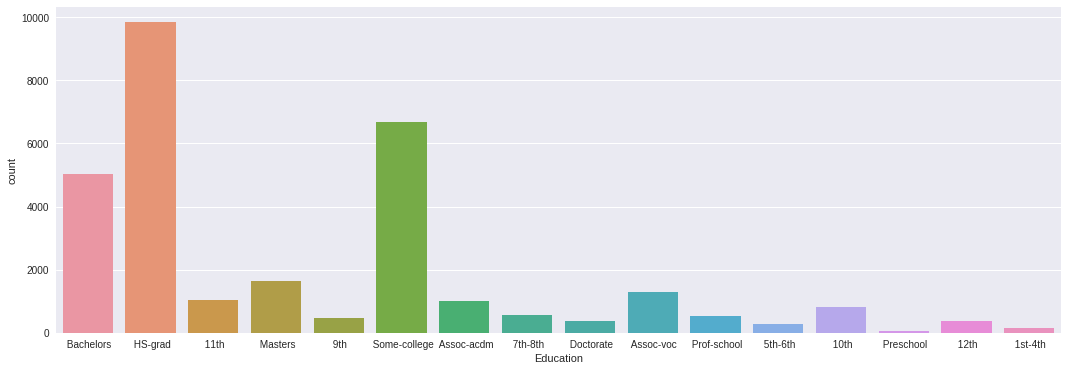

In [22]:
plt.figure(figsize=(18,6))
sns.countplot(df.Education)
sns.despine()
plt.show()

#### Working  Hours per week distriburion plot

The plot suggest us that:
1. Most of the people work for around 40 hours in a week.
2. There are few  people who works less than  5 hours in a week .
3. There are also few people who are working more than 80 hours in a week.

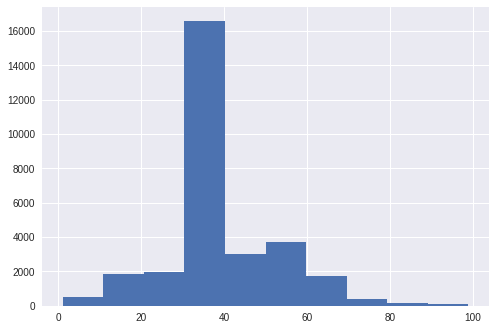

In [23]:
plt.hist(df.HoursperWeek,histtype='stepfilled')
plt.show()

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


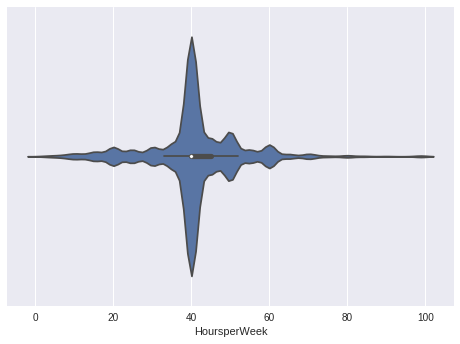

In [24]:
sns.violinplot(df.HoursperWeek)

### Bivariate Analysis

In bivariate analysis we will use two features each time to analysis the datasets and find out the affects on Income.



Since the 'Income' features is very important so I have made  a new column for encoding the values  of 'income' fatures into a numerical value to that I can find its co-relation with other features.

In [25]:
pre=preprocessing.LabelEncoder()

In [26]:
pre.fit(df.Income)

LabelEncoder()

In [27]:
df['Income(>50k)']=pre.transform(df.Income)


**Co-relation among the different features.**

In [28]:
df.corr()

,Age,fnlgwt,Education_num,Capital_Gain,Capital_Loss,HoursperWeek,Income(>50k)
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998
fnlgwt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
Education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
Capital_Gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
Capital_Loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
HoursperWeek,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
Income(>50k),0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


**Heat Map**

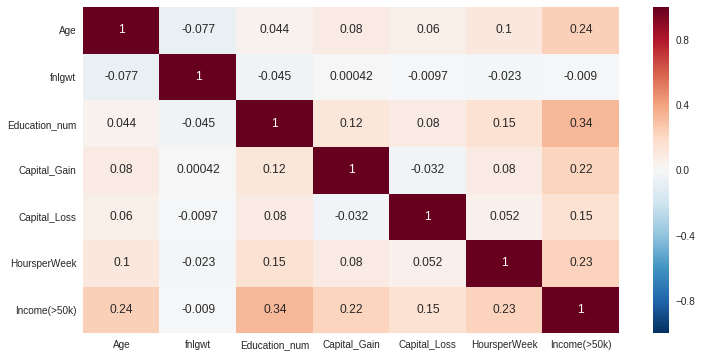

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

plt.show()

### Age Vs Income

The Age vs Income distribution plot suggests:
1. The people who are earning more than 50k are moslty  between 35 to 50 years old.
2. People who are less earning than 50k are mostly between 25 to 40 years old.
3. Most of the people having age between 35 to 65 are earning more than 50k.

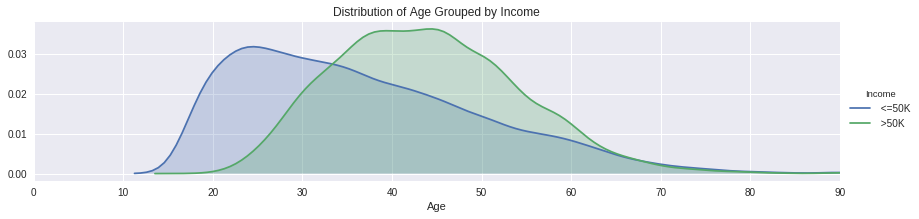

In [30]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Income', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Income')
fig.add_legend()
sns.despine()

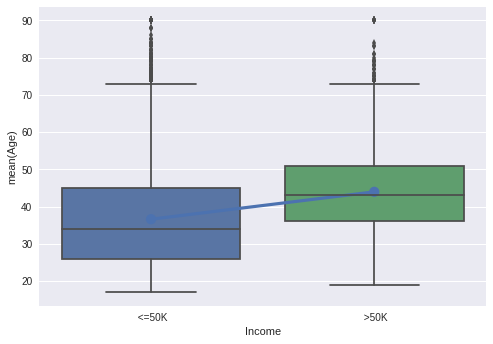

In [31]:
sns.boxplot(x = 'Income', y= 'Age',data = df)
sns.pointplot(x='Income',y='Age',data = df)
sns.despine()

#### Education vs Income plot

The education vs income plot shows that:
1. The people earning more than 50k are mostly  having degree of bachelors ,High school graduates or degree from some college.
2. The people earning less than 50k are also  mostly  having degree of bachelors ,High school graduates or degree from some college.
3. In most of the case ,there are more people having income less than 50k in compare people having income more than 50k.
4. Only in case of people holding the  degree of Docotrate or studied from prof-school,there are more people whose income is  more than 50k.
5. While people who are having degree less than 12th standard are generally having income less than 50k. 


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


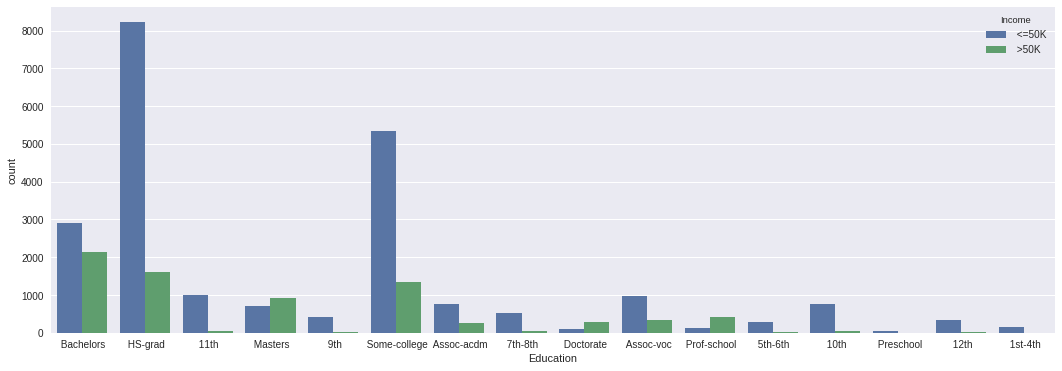

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(df.Education,hue=df.Income,)
plt.show()

Education and coresponding education number given in datasets:

In [33]:
edudata=pd.DataFrame({'Edu':df.Education.unique(),'Num':df.Education_num.unique()})
edudata.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Edu,Bachelors,HS-grad,11th,Masters,9th,Some-college,Assoc-acdm,7th-8th,Doctorate,Assoc-voc,Prof-school,5th-6th,10th,Preschool,12th,1st-4th
Num,13,9,7,14,5,10,12,4,16,11,15,3,6,1,8,2


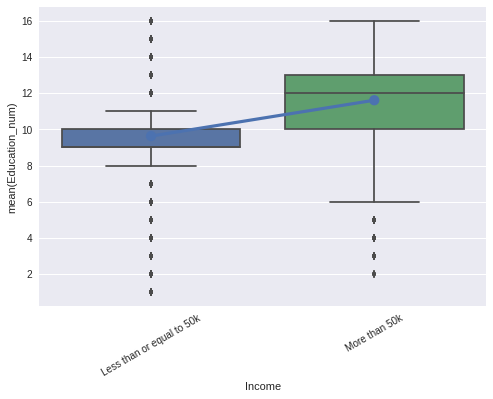

In [34]:
sns.boxplot(x = 'Income(>50k)',y = 'Education_num',data = df)
sns.pointplot(x = 'Income(>50k)',y = 'Education_num',data = df)
plt.xticks([0,1],['Less than or equal to 50k','More than 50k'],rotation=30)
plt.xlabel('Income')
sns.despine()


#### Income vs Race

The plot suggets that for each type of race ,there are people generally having income less than 50k. 

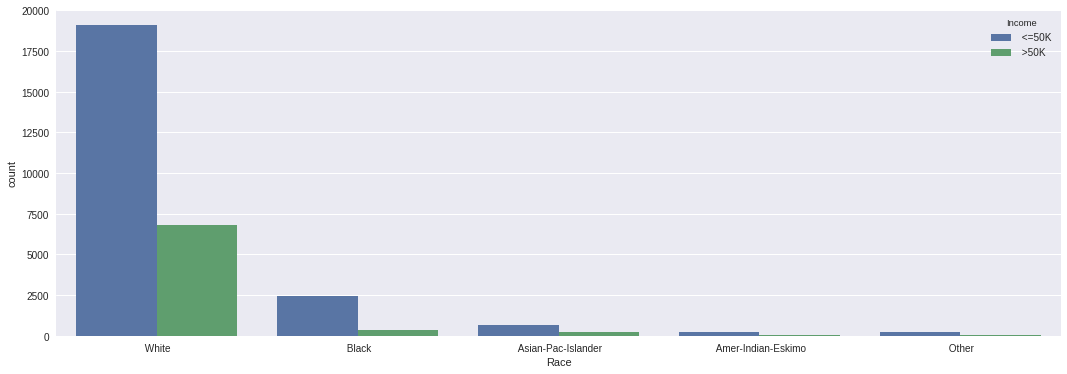

In [35]:
plt.figure(figsize=(18,6))
sns.countplot(df.Race,hue=df.Income)
sns.despine()
plt.show()

#### Occupation Vs Income

From the plot:
1. The most number of people who are having income above 50k are Execative Manager or having any professional speciality .
2. Most of people who are admiral clerk  ,craft repair ,or  working on other services  have income below 50k as the difference between count is huge.

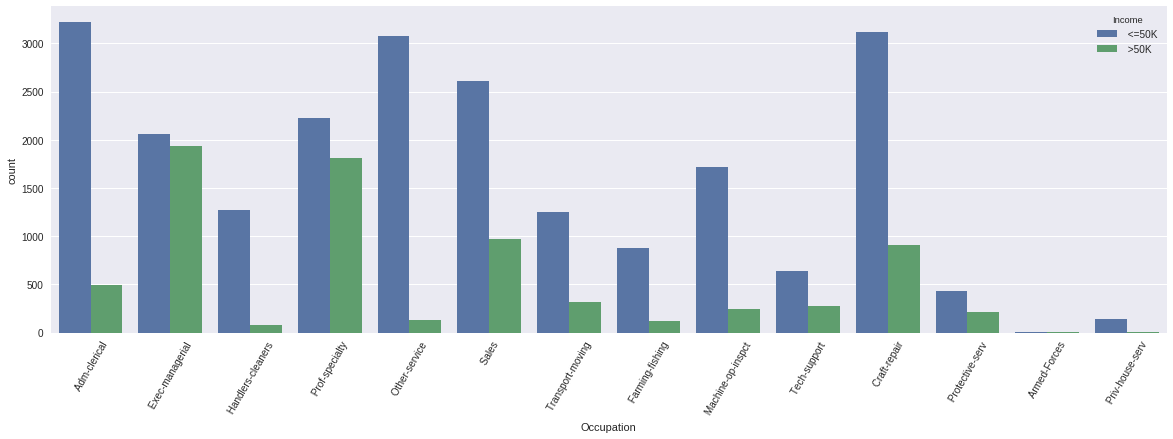

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(df.Occupation,hue=df.Income)
sns.despine()
plt.xticks(rotation=60)
plt.show()

#### Hours per Week Vs Income
Inferences:
1. People who are having income above 50k mostly work around 40 to 60 hours per week.
2. Although most people who are working around 40 hours per week are having income less than 50k. 


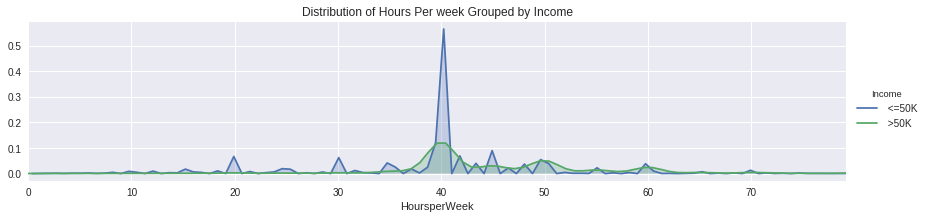

In [37]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Income',aspect=4)
fig.map(sns.kdeplot, 'HoursperWeek', shade=True)
oldest = df['HoursperWeek'].max()/1.25
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Hours Per week Grouped by Income')
fig.add_legend()
sns.despine()


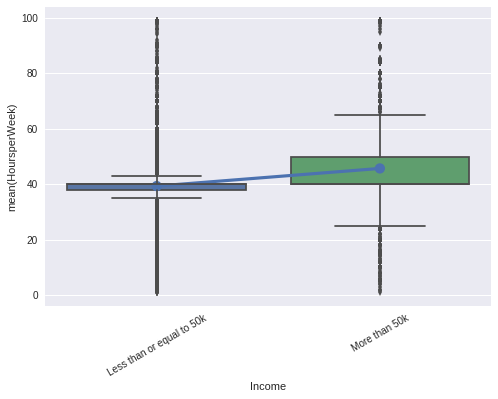

In [38]:
sns.boxplot(x = 'Income(>50k)',y = 'HoursperWeek',data = df)
sns.pointplot(x = 'Income(>50k)',y = 'HoursperWeek',data = df)
plt.xticks([0,1],['Less than or equal to 50k','More than 50k'],rotation=30)
plt.xlabel('Income')
sns.despine()

#### Capital Gain Vs Income
The plot  tells us that:
1. Generally  the people whose income is more than 50k are having capital gain more than 3k.
2. Most people whoese income is more than 50k have income around 15k .
3. Generally people whose income is below 50k are having capital gain below 5k.

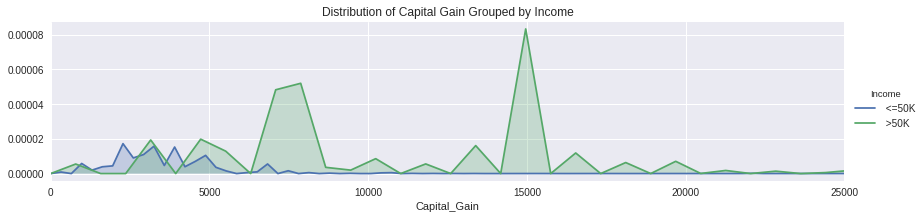

In [39]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Income',aspect=4)
fig.map(sns.kdeplot, 'Capital_Gain', shade=True)
oldest = df['Capital_Gain'].max()/4
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Capital Gain Grouped by Income')
fig.add_legend()
sns.despine()


#### Capital Loss Vs Income

The plot  tells us that:
1. People whose income are more than 50k have capital loss generally  betweeen  1.8k to 2k.
2. People whose income are below 50k have capital loss generally  less than  1.8k . 

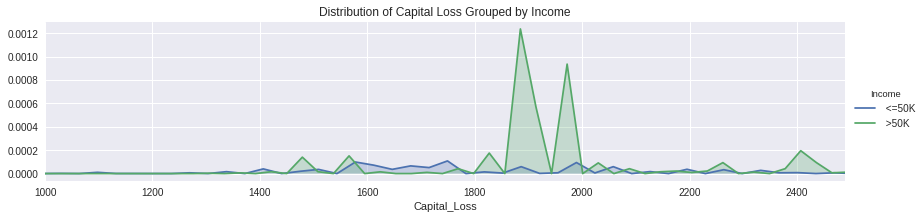

In [40]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Income',aspect=4)
fig.map(sns.kdeplot, 'Capital_Loss', shade=True)
oldest = df['Capital_Loss'].max()/1.75
fig.set(xlim=(1000,oldest))
fig.set(title='Distribution of Capital Loss Grouped by Income')
fig.add_legend()
sns.despine()


### Multivaraite Analysis


#### Net  Capital vs age in terms of Income

Since the capital gain and capital loss can be evaluted on the basis of net capital .Thus we will introduce a new column called 'Capital_Net' which will be equal to  'Capital_Gain-Capital_Loss'.

In [41]:
df['Capital_Net']=df.Capital_Gain-df.Capital_Loss

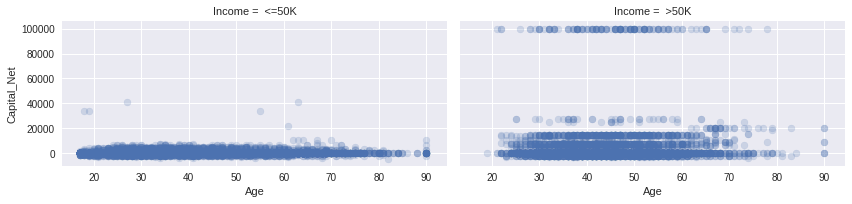

In [42]:
grid = sns.FacetGrid(df, col='Income',col_wrap = 2,aspect=2)
grid.map(plt.scatter,'Age','Capital_Net',alpha = 0.2)
sns.despine()

**Inferences from the plot:**
1. For the people who have income below 50k ,most of their net capital is less than 8k.As the age increases  above 70,we can see that their net captial is below 5k.
2. For the people whose income is above 50k ,generally their net capital is less than 20k.Although there are people whose net  capital is more than 20k in this category.Here age doesn't have that much affect. 

#### Education vs Net  Capital in terms of Income

Lets us see the eduation list along with  corresponding education number.

In [43]:
edudata.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Edu,Bachelors,HS-grad,11th,Masters,9th,Some-college,Assoc-acdm,7th-8th,Doctorate,Assoc-voc,Prof-school,5th-6th,10th,Preschool,12th,1st-4th
Num,13,9,7,14,5,10,12,4,16,11,15,3,6,1,8,2


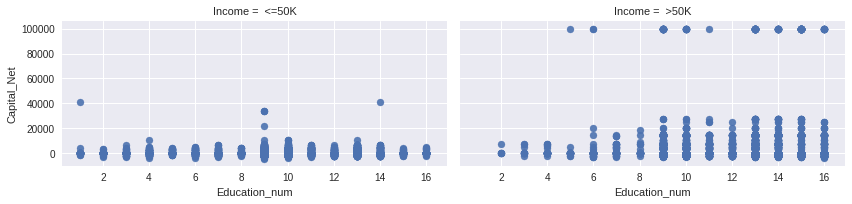

In [44]:
grid = sns.FacetGrid(df, col='Income',col_wrap = 2,aspect=2)
grid.map(plt.scatter,'Education_num','Capital_Net',alpha = 0.9)
sns.despine()


**Inferences from the plot:**

For people whose income is above  50k:

1.People with higher Eduation degree have more  net capital. 

##Conclusion of EDA

We have seen that people who are having higher education degree are most likely to have income more than 50k. The net capital of people having income above 50k are more than that of people having income below 50k.People who are having income above 50k mostly work around 40 to 60 hours per week.The most number of people who are having income above 50k are Execative Manager or having any professional speciality 




#Feature Engineering

Let us see the first five rows of our dataframe:

In [45]:
df.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,HoursperWeek,Native_country,Income,Income(>50k),Capital_Net
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [46]:
df.shape

(30162, 17)

We have total 17 columns,some of them were added during EDA.

In [47]:
print('Data Types of each column ')
df.dtypes

Data Types of each column 


Age                int64
Workclass         object
fnlgwt             int64
Education         object
Education_num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
HoursperWeek       int64
Native_country    object
Income            object
Income(>50k)       int64
Capital_Net        int64
dtype: object

We will encode the object dtype into integer.

In [48]:
pre.fit(df.Native_country)

LabelEncoder()

In [49]:
df['Native_country']=pre.transform(df.Native_country)

In [50]:
pre.fit(df.Marital_Status)

LabelEncoder()

In [51]:
df.Marital_Status=pre.transform(df.Marital_Status)

In [52]:
pre.fit(df.Occupation)

LabelEncoder()

In [53]:
df.Occupation=pre.transform(df.Occupation)

In [54]:
pre.fit(df.Race)

LabelEncoder()

In [55]:
df['Race_Code']=pre.transform(df.Race)

In [56]:
pre.fit(df.Workclass)

LabelEncoder()

In [57]:
df['Working_Class_code']=pre.transform(df.Workclass)

In [58]:
df['sex_code']=[1 if s=='Male' else 0 for s in df.Sex]

We will convert some continous datasets into categorical.

In [59]:
df['Categorical_age']=pd.qcut(df.Age,15,labels=[i for i in range(1,16)])

In [60]:
df['Categorical_Working(H/w)']=pd.cut(df.HoursperWeek,25,labels=[i for i in range(1,26) ])

Now we can drop some of the column.We will drop duplicates encoded columns andcategorised columns.We will also drop column 'fnlgwt' . 

In [61]:
df=df.drop(['Education','fnlgwt','Capital_Gain','Capital_Loss','Age','Race','Sex','Workclass','Income','Relationship'],axis=1)

In [62]:
print('first five row')
df.head()

first five row


,Education_num,Marital_Status,Occupation,HoursperWeek,Native_country,Income(>50k),Capital_Net,Race_Code,Working_Class_code,sex_code,Categorical_age,Categorical_Working(H/w)
0,13,4,0,40,38,0,2174,4,5,0,9,10
1,13,2,3,13,38,0,0,4,4,0,12,4
2,9,0,5,40,38,0,0,4,2,0,8,10
3,7,2,5,40,38,0,0,2,2,0,13,10
4,13,2,9,40,4,0,0,2,2,0,4,10


**Our dataframe is ready for computation.


#Building,Training and Predicting Using Various Model

In [63]:
X=df.drop('Income(>50k)',axis=1)

In [64]:
Y=df['Income(>50k)']

### Train Test split

We will use test size of 20 %.

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=20)

## Logistic regression

In [66]:
log=LogisticRegression()

In [67]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
log_predict=log.predict(x_test)

In [69]:
print('Accuracy Score:')
log_score=met.accuracy_score(y_test,log_predict)
log_score

Accuracy Score:


0.8140228741919443

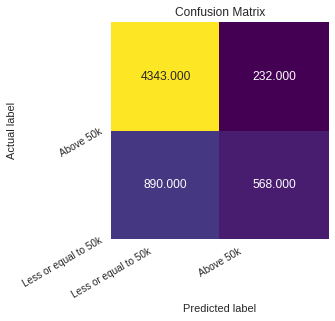

In [70]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,log_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print('Classification Report:\n')
print(met.classification_report(y_test,log_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      4575
          1       0.71      0.39      0.50      1458

avg / total       0.80      0.81      0.79      6033



##Support Vector Machine

In [72]:
sig=SVC(kernel='sigmoid')

In [73]:
sig.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
sig_predict=sig.predict(x_test)

In [75]:
sig_score=met.accuracy_score(y_test,sig_predict)
sig_score

0.7583291894579811

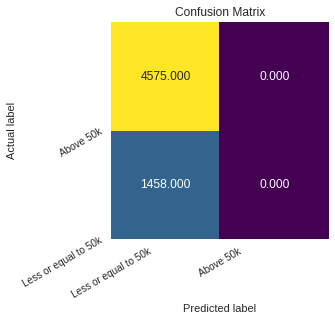

In [76]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,sig_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()


In [77]:
y_test,log_predict
print('Classification Report:\n')
print(met.classification_report(y_test,sig_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.76      1.00      0.86      4575
          1       0.00      0.00      0.00      1458

avg / total       0.58      0.76      0.65      6033



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree Classifier using *gini* Criterion

In [78]:
gdc=DecisionTreeClassifier(criterion='gini')

In [79]:
gdc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
gdc_predict=gdc.predict(x_test)

In [81]:
print('Accuracy Score')
gdc_score=met.accuracy_score(y_test,gdc_predict)
gdc_score

Accuracy Score


0.8234709099950274

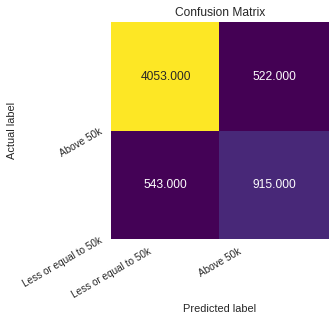

In [82]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,gdc_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [83]:
print('Classification Report:\n')
print(met.classification_report(y_test,gdc_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.88      0.89      0.88      4575
          1       0.64      0.63      0.63      1458

avg / total       0.82      0.82      0.82      6033



## Random Forest Classifier using *entropy* Criterion

In [84]:
erf=RandomForestClassifier(criterion='entropy')

In [85]:
erf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
erf_predict=erf.predict(x_test)

In [87]:
print('Accuracy Score:')
erf_score=met.accuracy_score(y_test,erf_predict)
erf_score

Accuracy Score:


0.8413724515166584

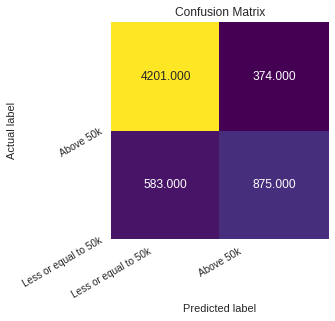

In [88]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,erf_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [89]:
print('Classification Report:\n')
print(met.classification_report(y_test,erf_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      4575
          1       0.70      0.60      0.65      1458

avg / total       0.84      0.84      0.84      6033



## Bagging Classifier

In [119]:
bag=BaggingClassifier()

In [120]:
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [121]:
bag_predict=bag.predict(x_test)

In [122]:
print('Accuracy Score')
bag_score=met.accuracy_score(y_test,bag_predict)
bag_score

Accuracy Score


0.840046411403945

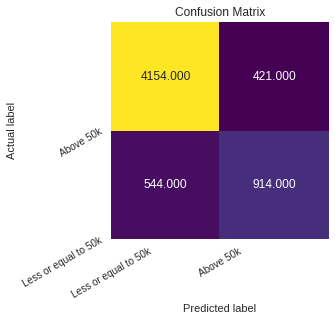

In [123]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,bag_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [124]:
print('Classification Report:\n')
print(met.classification_report(y_test,bag_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.88      0.91      0.90      4575
          1       0.68      0.63      0.65      1458

avg / total       0.84      0.84      0.84      6033



## Gradient Boosting Classifier

In [96]:
gb=GradientBoostingClassifier()

In [97]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [98]:
gb_predict=gb.predict(x_test)

In [99]:
print('Accuracy Score')
gb_score=met.accuracy_score(y_test,gb_predict)
gb_score

Accuracy Score


0.8647439085032322

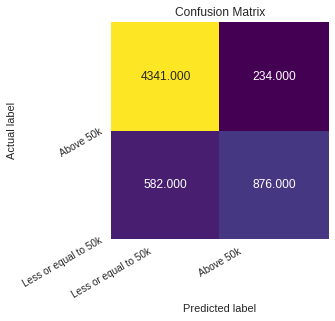

In [100]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,gb_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [101]:
print('Classification Report:\n')
print(met.classification_report(y_test,gb_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      4575
          1       0.79      0.60      0.68      1458

avg / total       0.86      0.86      0.86      6033



## Voting Classifier

In [113]:
vc=VotingClassifier([('tree',DecisionTreeClassifier()),('log',LogisticRegression()),('svm',SVC())])

In [114]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [115]:
vc_predict=vc.predict(x_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [116]:
print('Accuracy Score')
vc_score=met.accuracy_score(y_test,vc_predict)
vc_score

Accuracy Score


0.8501574672633847

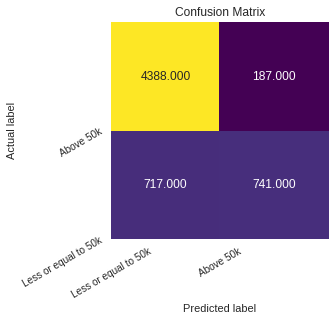

In [117]:
plt.figure(figsize=(4,4))
mat=met.confusion_matrix(y_test,vc_predict)
sns.heatmap(mat,annot=True,fmt=".3f",square = True, cmap = 'viridis', cbar=False)
plt.xticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30)
plt.xlabel('Predicted label')
plt.yticks(df['Income(>50k)'].unique(),['Less or equal to 50k','Above 50k'],rotation=30,)
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

In [118]:
print('Classification Report:\n')
print(met.classification_report(y_test,vc_predict))

Classification Report:

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      4575
          1       0.80      0.51      0.62      1458

avg / total       0.84      0.85      0.84      6033



##Comparison of different model

#### Comparing Accuracy Score of Various Model

In [125]:
model=['Logistic Regression','DecisionTree(gini)','RandomForest(entropy)','SVM(sigmoid)','Bagging','GradientBooster','VotingClassifier']
score=[log_score,gdc_score,erf_score,sig_score,bag_score,gb_score,vc_score]
predict=[log_predict,gdc_predict,erf_predict,sig_predict,bag_predict,gb_predict,vc_predict]
compare=pd.DataFrame({'Model':model,'Score':score},index=[i for i in range(1,8)])

In [126]:
compare.T

,1,2,3,4,5,6,7
Model,Logistic Regression,DecisionTree(gini),RandomForest(entropy),SVM(sigmoid),Bagging,GradientBooster,VotingClassifier
Score,0.814023,0.823471,0.841372,0.758329,0.840046,0.864744,0.850157


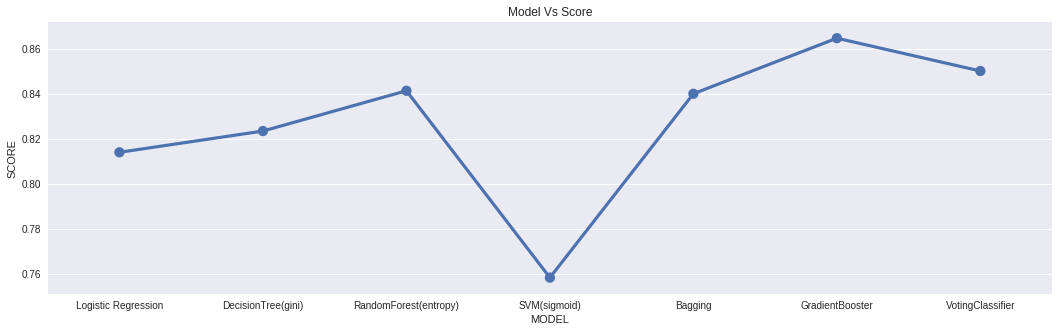

In [127]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='Score',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

**Inferences:**
We can notice that the accuracy score of the gradient boaster classifier is maximum(around 86%).The accuracy score  of random forest classifier using *entropy* criterion and bagging classifer are almost same (around 84%).And for voting classifier accuracy score is around 85%. The accuracy score of support vector machine using *sigmoid* kernel is minimum (around 75%).

#### Receiver Operating Characteristic Curve(ROC) for Various Classifier

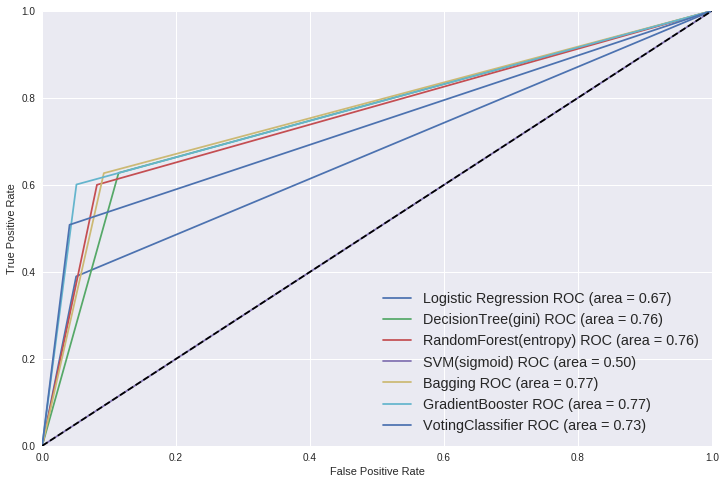

In [128]:
plt.figure(figsize=(12,8))
for i in range(7):
  fpr, tpr,_= met.roc_curve(y_test,predict[i])
  roc_auc  = met.auc(fpr, tpr)
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model[i], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='large')
plt.show()

**Inferences**:
The area under curve for sigmoid is .50 which is minimum among rest which suggests us that it is least accurate classifier.The area under curve for Gradient booster classifier and Bagging RCO are mroe than others which suggest that they are more accurate  classifier for this dataset.

#Conclusion:
While doing this project ,firstly  I have done data cleaning as there were some missing values in the csv file.


After that,i have made EDA report showing relationship between income and other features.


After completion of EDA ,I have done feature engineering .Some of the part of feature eginnering was done during EDA report .There were continuous datatype coloumns like Age,Hours per week which were to be changed into categorised one.And there were columns like Race,age etc which were encoded into numerical data.

After feature engineering,I  tried to develop build the datasets for training and testing sets to use on various models.I used 7 differenct  models for classification  and the accuracy score of each model is given below:





In [129]:
compare.T

,1,2,3,4,5,6,7
Model,Logistic Regression,DecisionTree(gini),RandomForest(entropy),SVM(sigmoid),Bagging,GradientBooster,VotingClassifier
Score,0.814023,0.823471,0.841372,0.758329,0.840046,0.864744,0.850157


The acccuracy score of Gradient Booster Classifier was maximum and accuracy score of SVM was minimun. 